## Calculate speckle contrast factor

Import required modules

In [1]:
from sympy import (symbols, Integral, integrate, cos, sin, cot, 
                   Eq, lambdify, exp, pi, Abs)

from scipy.integrate import quad, dblquad

from collections import OrderedDict

from sympy import init_printing
init_printing()

In [2]:
from sympy.printing import latex

Parameters
-----------
$\xi_h$   : Horizontal x-ray coherence length [$\mu$m]

$\xi_v$   : Vertical x-ray coherence length [$\mu$m]

$r$       : longitudinal x-ray coherence length in terms
          of $\Delta \lambda / \lambda$ [dimensionless]

$M$       : Vertical height of pinhole [$\mu$m]

$L$       : Horizontal width of pinhole [$\mu$m]

$W$       : X-ray penetration depth [$\mu$m]

$\theta$  : Half x-ray scattering angle [rad]

$\theta_i$: Incident x-ray scattering angle [rad]

$k_0$     : X-ray wavenumber [$\mu$m$^{-1}$]

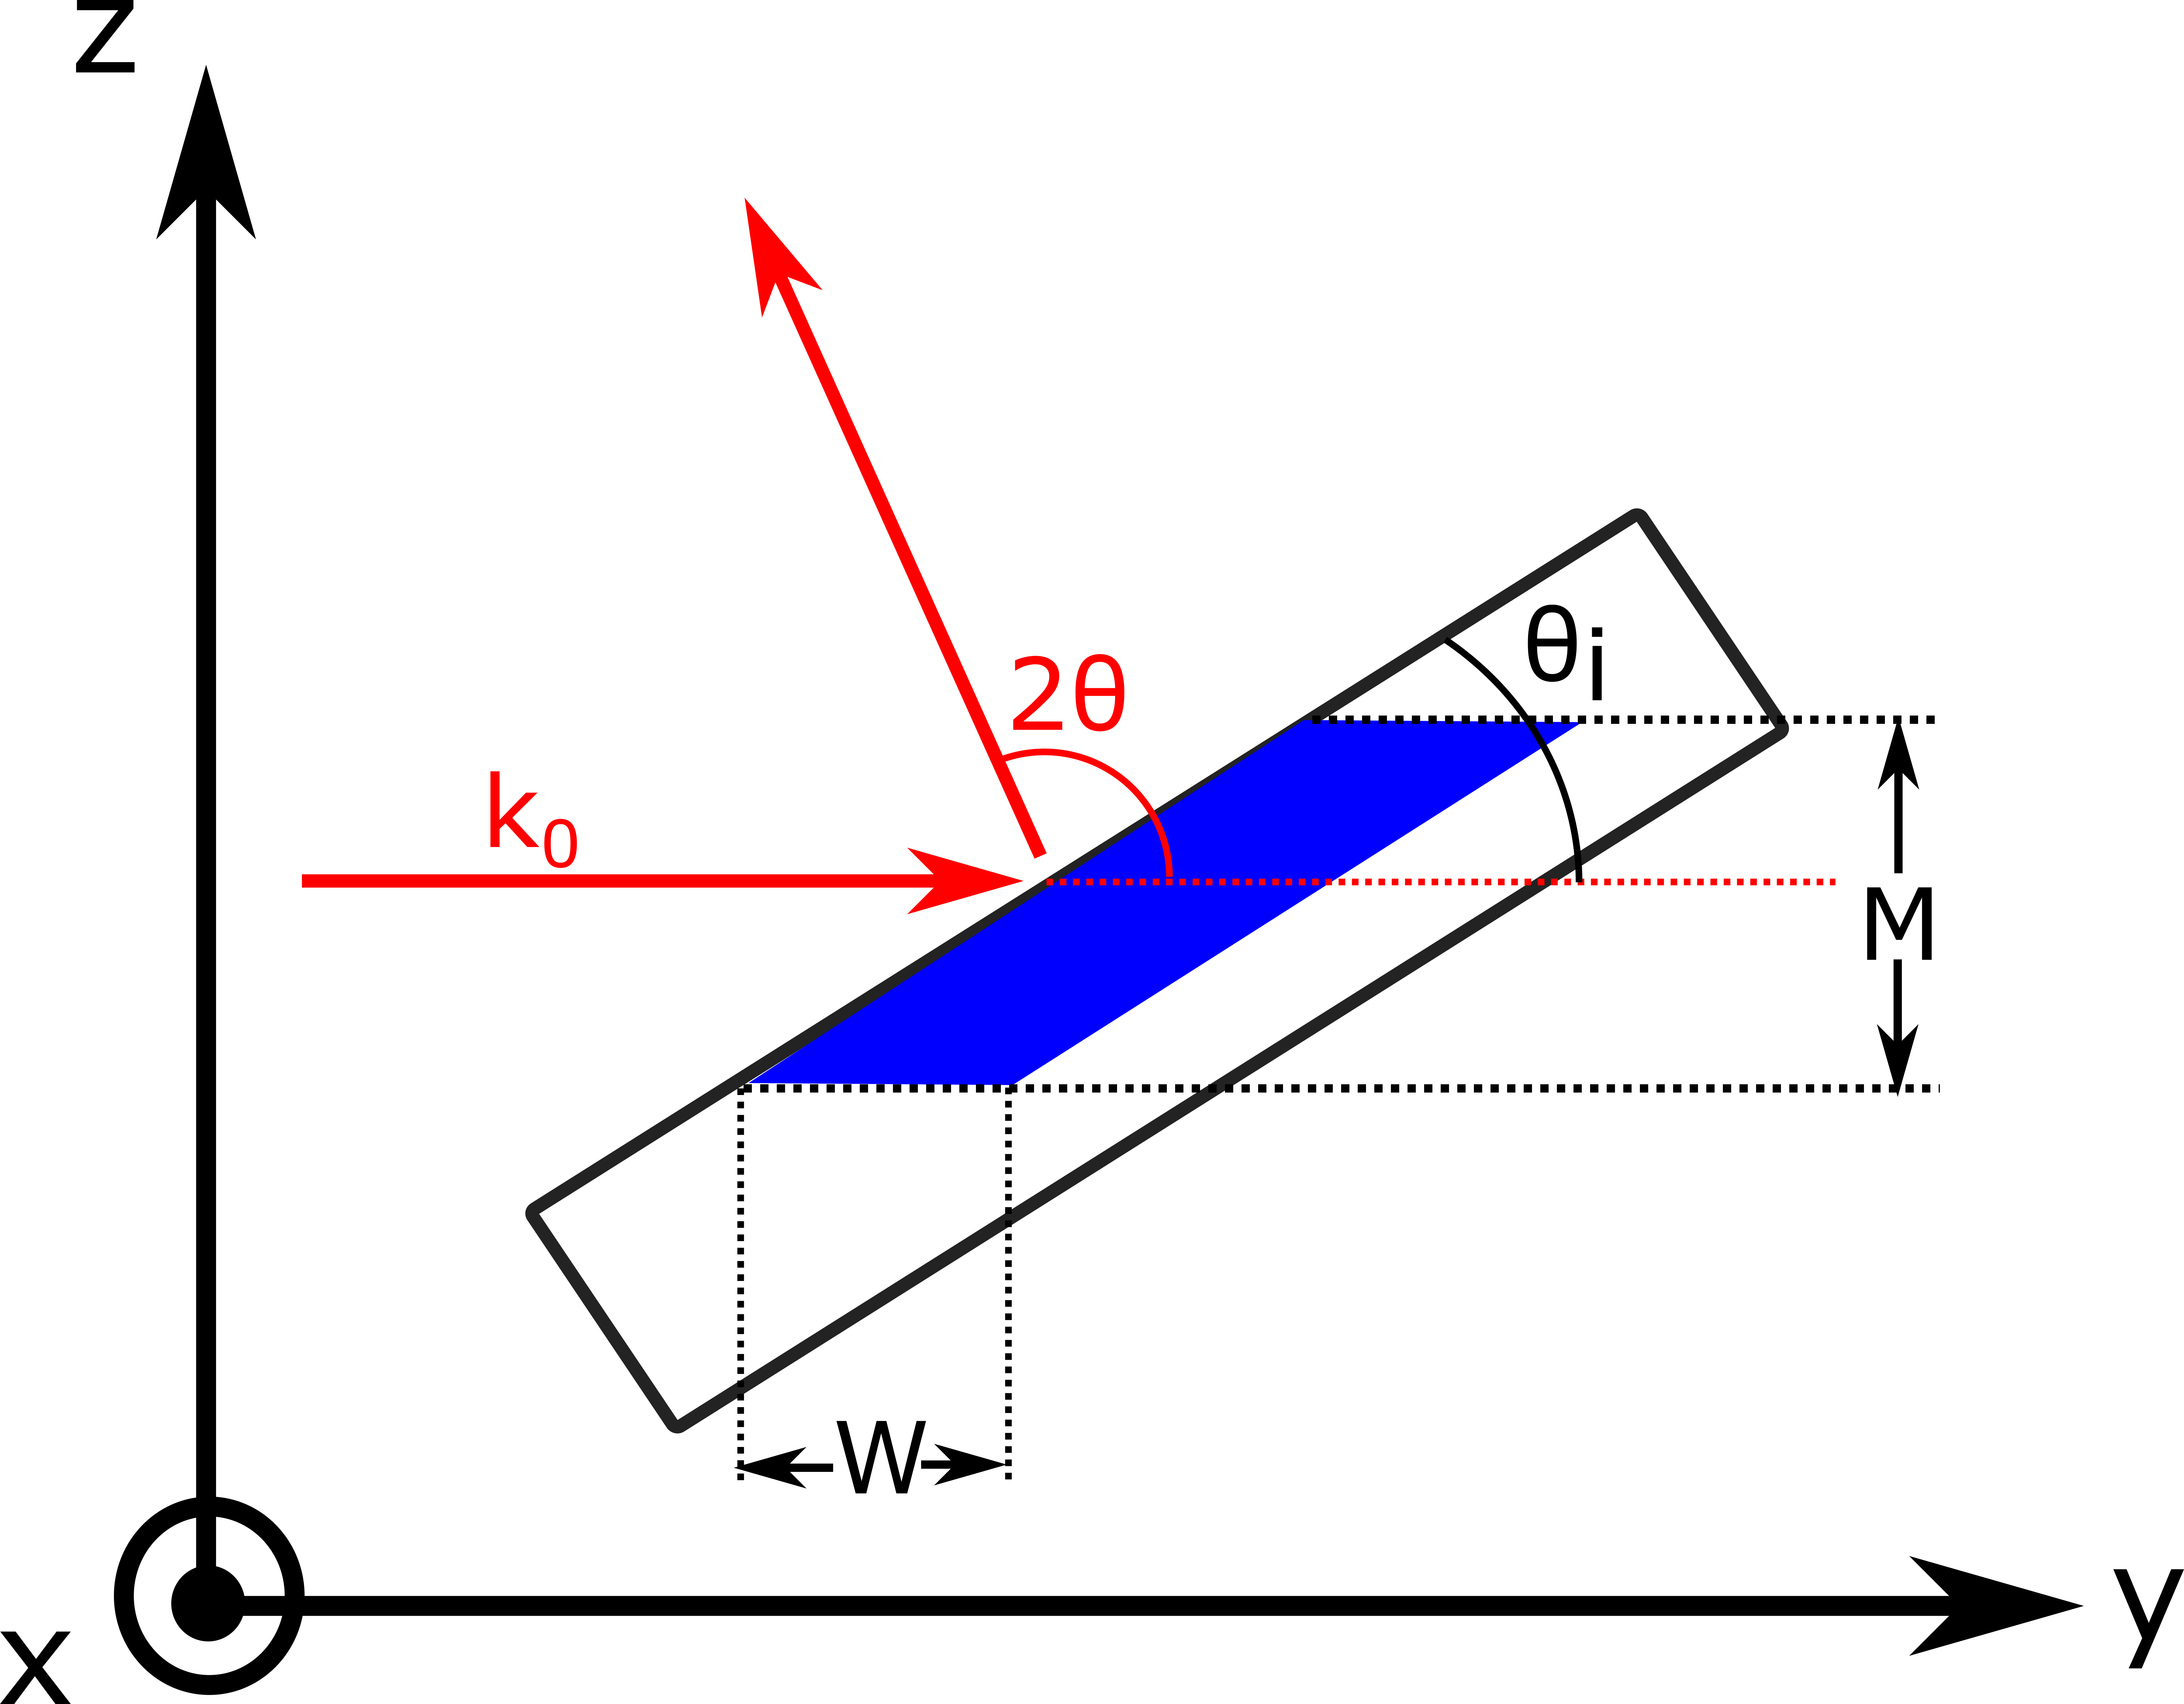

In [12]:
from IPython.display import Image
fig = Image(filename=('Fig_S1_Geometry.png'))
fig

X-rays with wavevector $k_0$ are incident on the sample at angle $\theta_i$ and are scattered through angle $2\theta$. The projections of the illuminated sample volume (shown in blue) along the $y$ and $z$ axes are $W$ and $M$, respectively.

In [3]:
values_dict = OrderedDict(xi_h=10,
                          xi_v=10,
                          r=1/1900,
                          M=10,
                          L=10,
                          W=0.15, 
                          theta=(119/2)*(pi/180),
                          theta_i=31*pi/180,
                          k_0=2*pi/(13.3e-4))

Speckle contrast factor, $\beta$ is composed of a vertical and radial components $\beta_z$ and $\beta_r$.

$\beta_z$ is

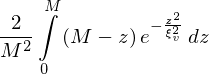

In [4]:
k_0, r, theta, theta_i, beta_z = symbols('k_0 r theta theta_i beta_z')
M, z, xi_v = symbols('M z xi_v')
beta_z = 2 / M**2 * Integral( (M-z) * exp(-z**2/xi_v**2) , (z, 0 , M))
beta_z

In [5]:
beta_z_val = beta_z.subs(values_dict).doit().evalf()
print("Which evaluates to {:.6f} .".format(beta_z_val))

Which evaluates to 0.861528 .


$\beta_r$ is

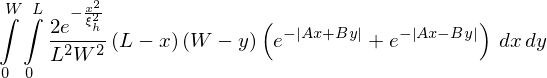

In [6]:
A, B, beta_r = symbols('A B beta_r')
L, W, x, y, xi_h = symbols('L W x y xi_h')
integrand = 2 / (W**2  * L**2) * (L-x) * (W-y) * exp(-x**2/xi_h**2) * (exp(-Abs(A*x + B*y)) + exp(-Abs(A*x - B*y)))
beta_r = Integral(integrand, (x, 0, L), (y, 0, W))
beta_r

This depends on parameters $A$ and $B$

In [7]:
Atosub = 4 * k_0 * r * (cos(theta)*sin(theta) - sin(theta)**2 * cot(theta_i))
Atosub

In [8]:
Btosub = -4*k_0* r * sin(theta)**2
Btosub

Evaluating $\beta_r$ gives

In [9]:
full_integrand = integrand.subs({A:Atosub, B:Btosub}).subs(values_dict)
f_integrand = lambdify((x, y), full_integrand)

L = values_dict['L']
W = values_dict['W']

beta_r_val = dblquad(f_integrand, 0., W, lambda x: 0., lambda x: L)[0]
beta_r_val

Combining gives $\beta$

In [10]:
beta_val = beta_r_val * beta_z_val
beta_val

and $\sqrt{\beta}$

In [11]:
beta_val**.5